## Load Neccessary Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Collect Data

In [36]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
print('# of passengers in original data: ' +str(len(titanic_data.index)))

# of passengers in original data: 891


## Analyzing Data
#### Creating Different plot to check relationship btw variables

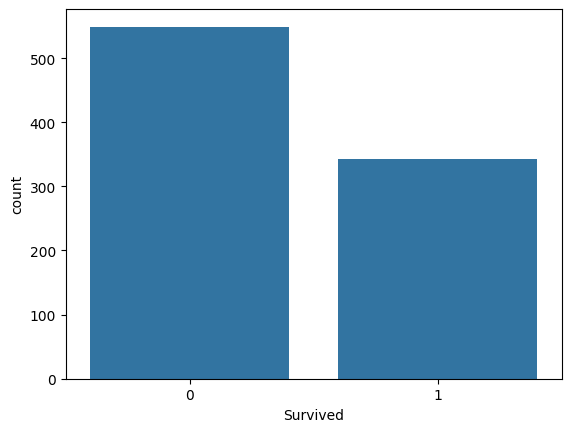

In [38]:
sns.countplot(x="Survived", data=titanic_data)
plt.show()
# 0 did not survive, 1 did

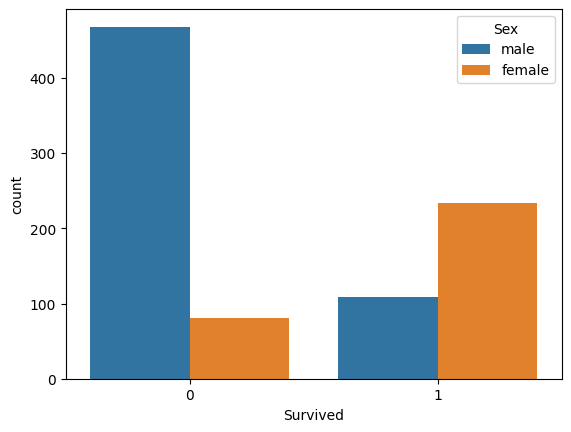

In [39]:
# Analyzing the sex of the passengers that survived vs those that did not
sns.countplot(x="Survived", hue="Sex", data=titanic_data)
plt.show()

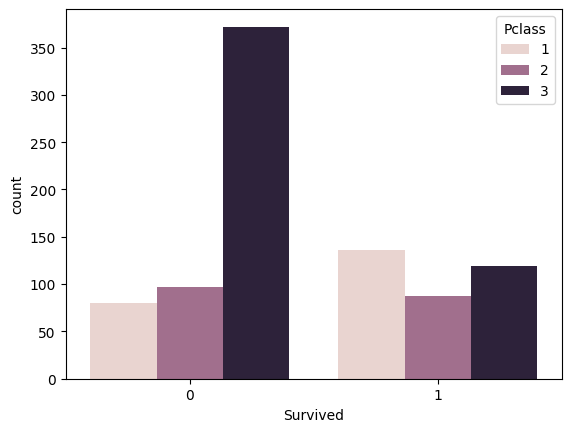

In [40]:
# Analyzing the data with respect to the passenger slot
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)
plt.show()

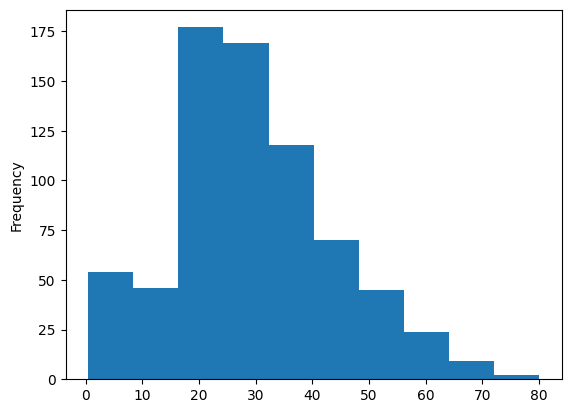

In [41]:
titanic_data["Age"].plot.hist()
plt.show()

<Axes: ylabel='Frequency'>

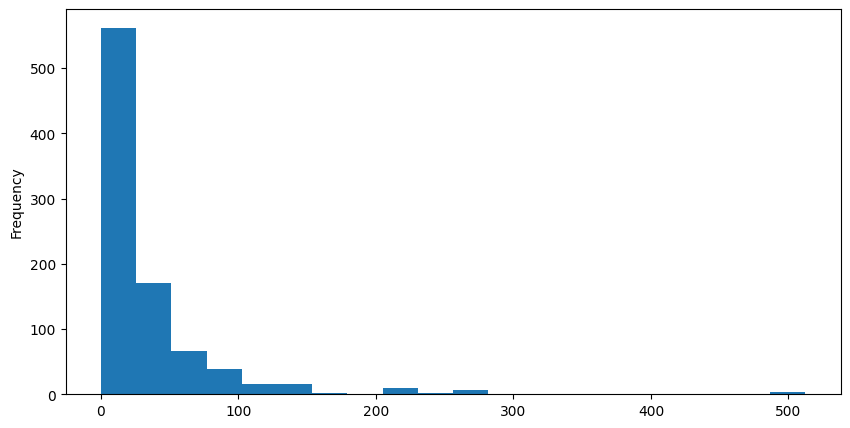

In [42]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [43]:
# We want to fully understand all our columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

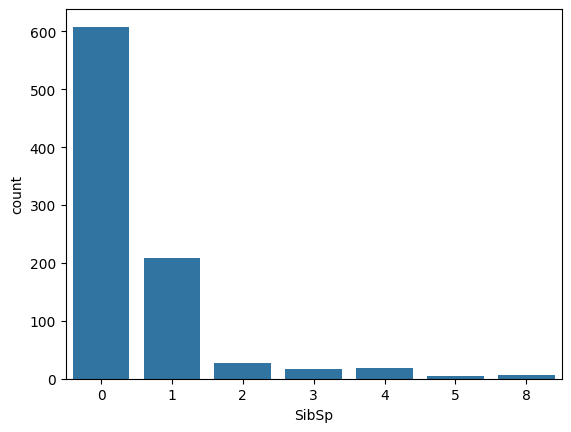

In [44]:
sns.countplot(x='SibSp', data=titanic_data)

## Data Wrangling
#### Clean the data by removing the Nan values and unnecessary columns in the dataset

In [45]:
# To check te null data, we use the syntax below
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
# checking the sum of all the null data, we use the syntax:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

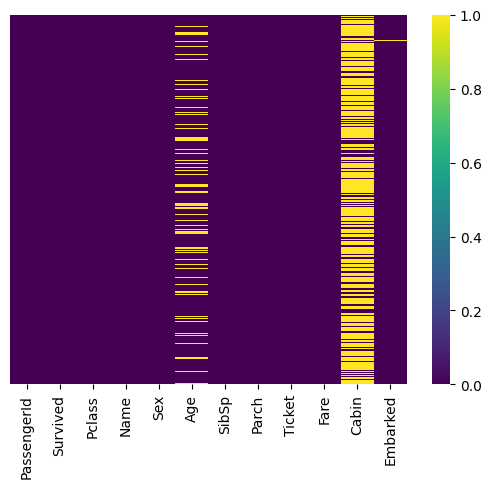

In [47]:
# We plot a heat map to visually analyze our null values
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

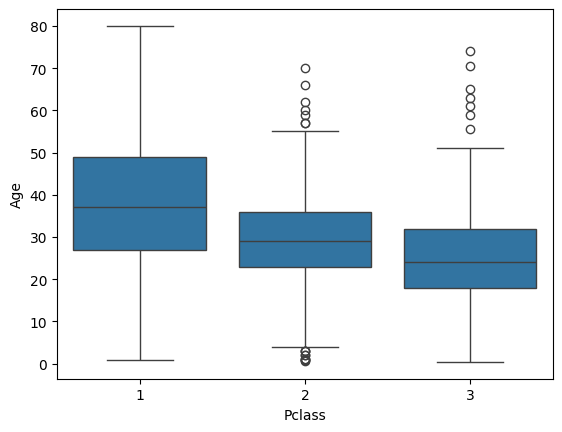

In [48]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [49]:
# Since we have a lot of null values, in the cabin column, we can simply drop this column
titanic_data.drop('Cabin', axis=1, inplace=True)

In [50]:
# We then drop all the null/NaN value
titanic_data.dropna(inplace=True)

<Axes: >

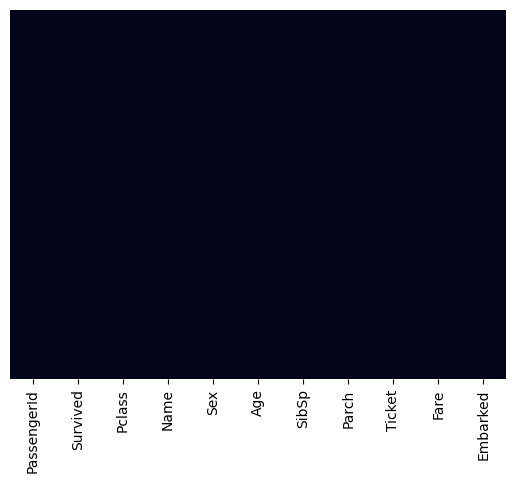

In [51]:
# Then we check to see if we have any null values left after dropna functions has removed the nulls
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [52]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### We have to convert all our string values to categorical values in order to perform Logistic Regression

In [53]:
# pd.get_dummies(titanic_data['Sex'])
# We do not have to check for both male and females becuase one column is enough to tell us that it is either of bot
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True, dtype=int)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [54]:
# In embark, the values are S,C and Q. SO here also, we can apply the get_dummies function
# embark = pd.get_dummies(titanic_data["Embarked"])
# Here also, we can drop the first column because if the values are nfalse on the last two, then it definitely belongs to the first one
embark = pd.get_dummies(titanic_data["Embarked"], drop_first=True, dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [55]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True, dtype=int)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


#### Now, we have made this values we edited categorical, the next step is to concatenate all these new rows into a data set

In [56]:
# We then add these new columns to our dataset
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [57]:
# Then we drop the previous versions of the new columns
titanic_data.drop(['Sex', 'Embarked', 'Pclass', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [58]:
# titanic_data.drop('Pclass', axis=1, inplace=True)

In [59]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


## Train and Test Data

In [60]:
# We first define rour dependent variable and our independent variable
# where y is our dependent var and x is independent var
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X.columns = X.columns.astype(str)

In [61]:
# We then split our data into training and testing subsets, using sklearn lib
from sklearn.model_selection import train_test_split

In [62]:
# The random state means the randomness of the samples, if we set it to 1, our model would tabe exactly the same sample every time
# The test_size relates to how the data is being splitted, if we say 0.3, i.e we split our data in a 70 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [63]:
# Next we have to train and predict by creating a model
# Logistic regression will grab from the linear regression
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression(max_iter=1000)

In [65]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
# We need to make predictions
predictions = logmodel.predict(X_test)

# We have now created our model and we have made predictions

In [67]:
# To evaluate how our model has been performing, we can calculate the accuracy or we calculate a classification report
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

## Accuracy Check

In [69]:
from sklearn.metrics import confusion_matrix
# Confusion matrix is a 2 dimensional matrix which has 4 outcomes which tells us how accurate our values aare
# 

In [71]:
confusion_matrix(y_test, predictions)
# To get our accuracy manually we add the first and last val of our confusion_matrix values and divide this sum by the total sum of all values

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test, predictions)

0.7710280373831776